In [2]:
import github_command as gitcmd

In [9]:
gitcmd.push(file_to_transfer='READMe.md',
            message = 'update README',
            repos = 'TDs_ESILV')

In [625]:
gitcmd.push(file_to_transfer='TD3_PlayingWithPandas.ipynb',
            message = 'TD3 Jupyter Notebook',
            repos = 'TDs_ESILV')

In [443]:
#files_to_push = ['TD3_PlayingWithPandas.ipynb', 'data_accidents', 'github_command.py']
#commits       = ['Jupyter Notebook', 'datasets + documentation', 'Github synchro']
#gitcmd.push_multiple_files(files_to_push, commits, 'TDs_ESILV.git')

## 0) Petit aparté sur le téléchargements

In [1]:
url_documentation = "https://www.data.gouv.fr/fr/datasets/r/15fe0ed9-e645-4678-959f-2fa9f41db6b2"

### 0.1. On pourrait très bien télécharger les liens avec BeautifulSoup (cf TD précédent)

In [15]:
url_vehicules2016        = "https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7"
url_vehicules2017        = "https://static.data.gouv.fr/resources/base-de-donnees-accidents-corporels-de-la-circulation/20180927-111247/vehicules-2017.csv"
url_usagers2017          = "https://www.data.gouv.fr/fr/datasets/r/07bfe612-0ad9-48ef-92d3-f5466f8465fe"
url_lieux2017            = "https://www.data.gouv.fr/fr/datasets/r/9b76a7b6-3eef-4864-b2da-1834417e305c"
url_caracteristiques2017 = "https://www.data.gouv.fr/fr/datasets/r/9a7d408b-dd72-4959-ae7d-c854ec505354"

In [16]:
url_documentation = "https://www.data.gouv.fr/fr/datasets/r/15fe0ed9-e645-4678-959f-2fa9f41db6b2"

In [17]:
import requests as req

In [18]:
reponse = req.get(url_documentation)

In [19]:
reponse.content[0:500]

b'%PDF-1.4\n%\xc7\xec\x8f\xa2\n61 0 obj\n<</Linearized 1/L 54495/H[ 13728 199]/O 63/E 13728/N 10/T 53233>>\nendobj\n                                                 \nxref\n61 19\n0000000015 00000 n \n0000000692 00000 n \n0000000808 00000 n \n0000000971 00000 n \n0000006414 00000 n \n0000006435 00000 n \n0000006477 00000 n \n0000006703 00000 n \n0000006907 00000 n \n0000006990 00000 n \n0000007071 00000 n \n0000007157 00000 n \n0000007188 00000 n \n0000007252 00000 n \n0000012939 00000 n \n0000013059 00000 n \n0000013392 00000 n \n00'

In [116]:
!pip install wget

### 0.2. Utilisation de wget pour télécharger les fichiers dans un repo local

#### 0.2.1. Création d'un directory if not exist pour y mettre la docu et les CSV

In [118]:
import wget

In [6]:
import os
dossier = "data_accidents/"
if not os.path.exists(dossier):
    os.mkdir(dossier)

In [130]:
wget.download(url_documentation, out=dossier+'documentation.pdf')

'data_accidents/documentation (1).pdf'

#### 0.2.2. Download les csv (remarque: on aurait pu directement les ouvrir depuis Pandas)

In [461]:
to_download = ['url_vehicules2016', 'url_vehicules2017', 'url_usagers2017', 'url_lieux2017', 'url_caracteristiques2017']
for dataset in to_download:
    wget.download(eval(dataset), out=dossier + dataset.split('_')[1] + '.csv')

In [457]:
!head -n 2 data_accidents/vehicules2017.csv

In [167]:
!head -n 2 $dossier/vehicules2017.csv

## 1) Ouverture du/des CSV 

In [7]:
import pandas as pd

### 1.1. Bien veiller à mettre les bons séparateurs
### 1.2. Bien spécifier l'encodage initial du fichier (car python décode par défaut en utf-8)

In [8]:
df = pd.read_csv(dossier+"vehicules2016.csv", sep=',', encoding='latin-1') # regardez le séparateur au desus

In [463]:
df.head(10)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8,3.0,5,"46, rue Sonneville",M,0.0,0.0,590
1,201600000002,16,3,16,1800,1,2,6,1,6.0,5,1a rue du cimetière,M,0.0,0.0,590
2,201600000003,16,7,13,1900,1,1,1,1,6.0,11,NaN,M,0.0,0.0,590
3,201600000004,16,8,15,1930,2,2,1,7,3.0,477,52 rue victor hugo,M,0.0,0.0,590
4,201600000005,16,12,23,1100,1,2,3,1,3.0,11,rue Joliot curie,M,0.0,0.0,590
5,201600000006,16,12,23,1115,1,2,1,7,6.0,11,Rue Jean-baptiste LEBAS,M,0.0,0.0,590
6,201600000007,16,5,1,1145,1,2,1,7,2.0,51,rue Jules FERRY,M,0.0,0.0,590
7,201600000008,16,5,14,1915,2,1,1,1,1.0,250,NaN,M,0.0,0.0,590
8,201600000009,16,9,23,1900,1,2,1,1,3.0,51,rn41,M,0.0,0.0,590
9,201600000010,16,12,30,1030,1,1,1,9,6.0,303,NaN,M,0.0,0.0,590


#### 1.2.1 simple slicing

In [362]:
df[df['Num_Acc'] == 201600000002]

,Num_Acc,annee,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,date
1,201600000002,16,3,16,1800,1,En agglomeration,Giratoire,Normale,6.0,5,1a rue du cimetière,M,0.0,0.0,590,2016-03-16


In [386]:
df['mois'].head()

0     2
1     3
2     7
3     8
4    12
Name: mois, dtype: int64

In [387]:
df[['mois', 'jour']].head()

,mois,jour
0,2,1
1,3,16
2,7,13
3,8,15
4,12,23


In [388]:
df[df['Num_Acc'] == 201600000002][['mois', 'jour']]

,mois,jour
1,3,16


### 1.2.2. autre possibilité : loc / iloc

In [389]:
df.iloc[2:4, 1:4]

,an,mois,jour
2,16,7,13
3,16,8,15


In [390]:
df.loc[df['Num_Acc']==201600000002, ['mois', 'jour']]

,mois,jour
1,3,16


### 1.3. des infos sur le dataset

In [391]:
df.shape

(59432, 16)

In [177]:
df.head(5).T

,0,1,2,3,4
Num_Acc,201600000001,201600000002,201600000003,201600000004,201600000005
an,16,16,16,16,16
mois,2,3,7,8,12
jour,1,16,13,15,23
hrmn,1445,1800,1900,1930,1100
lum,1,1,1,2,1
agg,2,2,1,2,2
int,1,6,1,1,3
atm,8,1,1,7,1
col,3,6,6,3,3


In [178]:
df.describe()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,lat,long,dep
count,5.943200e+04,59432.0,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59432.000000,59430.000000,59432.000000,4.658500e+04,4.658500e+04,59432.000000
mean,2.016000e+11,16.0,6.701844,15.532693,1373.312710,1.909039,1.644569,1.760600,1.521419,4.126283,189.693465,4.101576e+06,2.368367e+05,583.326036
std,1.715668e+04,0.0,3.430012,8.811738,545.604479,1.503857,0.478648,1.573385,1.505213,1.962217,170.001085,1.568368e+06,4.428120e+05,294.487352
min,2.016000e+11,16.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,-4.760340e+05,10.000000
25%,2.016000e+11,16.0,4.000000,8.000000,945.000000,1.000000,1.000000,1.000000,1.000000,3.000000,57.000000,4.353665e+06,0.000000e+00,330.000000
50%,2.016000e+11,16.0,7.000000,15.000000,1442.000000,1.000000,2.000000,1.000000,1.000000,3.000000,118.000000,4.722596e+06,2.321900e+05,670.000000
75%,2.016000e+11,16.0,10.000000,23.000000,1810.000000,3.000000,2.000000,2.000000,1.000000,6.000000,281.000000,4.883760e+06,4.021730e+05,840.000000
max,2.016001e+11,16.0,12.000000,31.000000,2359.000000,5.000000,2.000000,9.000000,9.000000,7.000000,907.000000,5.106528e+06,6.156877e+06,976.000000


###  1.4.regardons les types de chaques colonnes 

In [180]:
df.dtypes

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn         int64
lum          int64
agg          int64
int          int64
atm          int64
col        float64
com          int64
adr         object
gps         object
lat        float64
long       float64
dep          int64
dtype: object

### 1.5. Listons les colonnes

In [181]:
df.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

### 1.6. Affichage / Viz directement avec Pandas

pandas donne aux dataframes la possibilité de faire des graphs, avec la méthode "plot" .
Ici [ plot(kind="box") ] pour une boîte à moustache
une configuration du notebook avec [ %matplotlib notebook ] pour un affichage dynamique


In [9]:
%matplotlib inline

### 1.7. setting parameters for figure size :

In [183]:
### c'est plus gros comme ça... on override les params par défaut

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[6.0, 4.0]

In [11]:
plt.rcParams['figure.figsize'] = [12, 4]

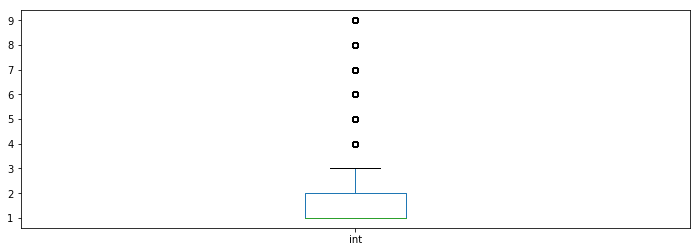

In [190]:
df.int.plot(kind='box')

In [191]:
df.int.value_counts(dropna=False)

1    41629
2     6990
3     5513
6     1924
4     1018
7      822
9      804
5      658
8       74
Name: int, dtype: int64

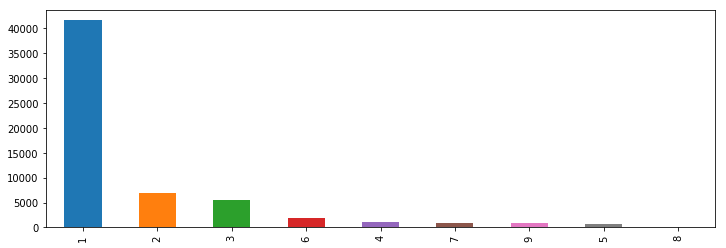

In [192]:
df.int.value_counts(dropna=False).plot(kind='bar')

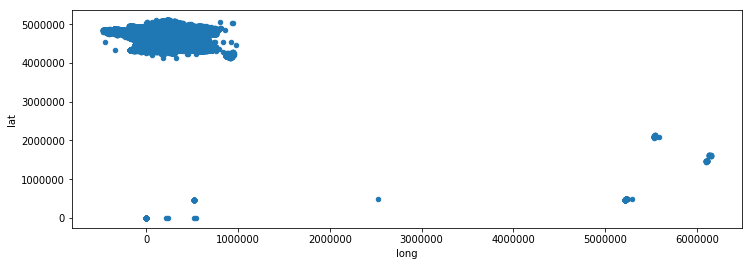

In [392]:
df.plot(kind='scatter', x='long', y='lat')

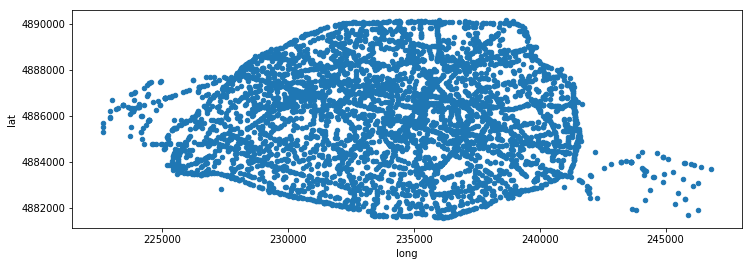

In [423]:
df[df['dep'] == 750].plot(kind='scatter', x='long', y='lat')

### 1.8. Nb de valeurs uniques par colonnes

In [193]:
valforcols = df.nunique()
valforcols

Num_Acc    59432
an             1
mois          12
jour          31
hrmn        1312
lum            5
agg            2
int            9
atm            9
col            7
com          814
adr        36915
gps            5
lat        31334
long       35810
dep          101
dtype: int64

### 1.9. lister les colonnes ayant pour nb de valeurs uniques différentes moins de 50 catégories

In [194]:
justunder50 = valforcols[valforcols<50].index
justunder50

Index(['an', 'mois', 'jour', 'lum', 'agg', 'int', 'atm', 'col', 'gps'], dtype='object')

### 1.10. faire une boucle (déconseillé sur les lignes, sur les colonnes ok ) 

In [195]:
for col in justunder50:
    print(col)
    print(pd.value_counts(df[col]))

an
16    59432
Name: an, dtype: int64
mois
10    5596
9     5408
11    5356
6     5328
7     5252
5     5139
12    5110
1     4802
3     4599
4     4430
8     4311
2     4101
Name: mois, dtype: int64
jour
6     2148
8     2135
12    2095
7     2079
9     2073
10    2066
4     2063
5     2027
22    2021
13    2002
15    1989
23    1967
14    1966
3     1961
28    1941
29    1912
1     1912
11    1908
16    1894
18    1886
30    1870
2     1859
21    1854
27    1847
25    1844
19    1839
26    1809
24    1800
17    1799
20    1770
31    1096
Name: jour, dtype: int64
lum
1    40578
5     9689
3     5089
2     3568
4      508
Name: lum, dtype: int64
agg
2    38308
1    21124
Name: agg, dtype: int64
int
1    41629
2     6990
3     5513
6     1924
4     1018
7      822
9      804
5      658
8       74
Name: int, dtype: int64
atm
1    47897
2     6582
8     1640
3     1422
7      667
5      621
9      300
4      159
6      144
Name: atm, dtype: int64
col
6.0    19993
3.0    16576
2.0     7199

### 1.11. Les duplicates

In [333]:
df[df.duplicated()]

,Num_Acc,annee,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,date


In [337]:
df.columns

Index(['Num_Acc', 'annee', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep', 'date'],
      dtype='object')

In [353]:
df[df.duplicated(subset=['lat', 'long'])].head(10)

,Num_Acc,annee,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,date
1,201600000002,16,3,16,1800,1,En agglomeration,Giratoire,Normale,6.0,5,1a rue du cimetière,M,0.0,0.0,590,2016-03-16
2,201600000003,16,7,13,1900,1,Hors agglomeration,Hors intersection,Normale,6.0,11,NaN,M,0.0,0.0,590,2016-07-13
3,201600000004,16,8,15,1930,2,En agglomeration,Hors intersection,Temps éblouissant,3.0,477,52 rue victor hugo,M,0.0,0.0,590,2016-08-15
4,201600000005,16,12,23,1100,1,En agglomeration,Intersection en T,Normale,3.0,11,rue Joliot curie,M,0.0,0.0,590,2016-12-23
5,201600000006,16,12,23,1115,1,En agglomeration,Hors intersection,Temps éblouissant,6.0,11,Rue Jean-baptiste LEBAS,M,0.0,0.0,590,2016-12-23
6,201600000007,16,5,1,1145,1,En agglomeration,Hors intersection,Temps éblouissant,2.0,51,rue Jules FERRY,M,0.0,0.0,590,2016-05-01
7,201600000008,16,5,14,1915,2,Hors agglomeration,Hors intersection,Normale,1.0,250,NaN,M,0.0,0.0,590,2016-05-14
8,201600000009,16,9,23,1900,1,En agglomeration,Hors intersection,Normale,3.0,51,rn41,M,0.0,0.0,590,2016-09-23
9,201600000010,16,12,30,1030,1,Hors agglomeration,Hors intersection,Autre,6.0,303,NaN,M,0.0,0.0,590,2016-12-30
10,201600000011,16,1,25,800,2,En agglomeration,Hors intersection,Temps couvert,6.0,466,141 rue nationale,M,0.0,0.0,590,2016-01-25


## 2) Fonctions utiles de Pandas

### 2.1. Appliquer une fonction sur une colonne

In [196]:
uneFonctionEnUneLigne = lambda x: x**2 + x/10

In [197]:
uneFonctionEnUneLigne(9)

81.9

In [198]:
df.dtypes[df.dtypes=='int64']

Num_Acc    int64
an         int64
mois       int64
jour       int64
hrmn       int64
lum        int64
agg        int64
int        int64
atm        int64
com        int64
dep        int64
dtype: object

In [202]:
df.int.apply(uneFonctionEnUneLigne)[0:5]

0     1.1
1    36.6
2     1.1
3     1.1
4     9.3
Name: int, dtype: float64

### ... ou sur plusieurs colonnes

In [206]:
df[df.dtypes[df.dtypes=='int64'].index].apply(uneFonctionEnUneLigne).head()

,Num_Acc,annee,mois,jour,hrmn,lum,agg,int,atm,com,dep
0,4.382806e+18,257.6,4.2,1.1,2088169.5,1.1,4.2,1.1,64.8,25.5,348159.0
1,4.382806e+18,257.6,9.3,257.6,3240180.0,1.1,4.2,36.6,1.1,25.5,348159.0
2,4.382807e+18,257.6,49.7,170.3,3610190.0,1.1,1.1,1.1,1.1,122.1,348159.0
3,4.382807e+18,257.6,64.8,226.5,3725093.0,4.2,4.2,1.1,49.7,227576.7,348159.0
4,4.382808e+18,257.6,145.2,531.3,1210110.0,1.1,4.2,9.3,1.1,122.1,348159.0


### ... ou même uniquement sélectionner des colonnes particulières pour effectuer un calcul.
Example: créer une colonnes de **temps** en mode jour/mois/année (format: datetime)

#### 2.1.1. Mais d'abord : les dates avec pd.to_datetime()

In [240]:
une_date = pd.to_datetime('2017-09-18') #string, default None strftime to parse time, eg "%d/%m/%Y"

In [241]:
une_date

Timestamp('2017-09-18 00:00:00')

In [242]:
une_date.day

18

In [248]:
pd.to_datetime("2019-09-20") - une_date

Timedelta('732 days 00:00:00')

In [249]:
(pd.to_datetime("2019-09-20") - une_date).days

732

#### Spécifier un format 
pd.to_datetime('', format="")

In [252]:
pd.to_datetime('10/09/2019', format="%m/%d/%Y") # bien regarder les diff de format sur le site

Timestamp('2019-10-09 00:00:00')

In [255]:
try:
    pd.to_datetime('10/09/19', format="%m/%d/%Y") # bien regarder les diff de format sur le site
except Exception as e:
    print('did not convert because :\n' + str(e))

did not convert because :
time data '10/09/19' does not match format '%m/%d/%Y' (match)


### 2.2. le conseil de votre vie ! Faites attention à pd.to_datetime si vous ne spécifiez pas de format
il est parfois trop intelligent et tente le tout pour le tout

In [270]:
pd.to_datetime('10/07/19').day

7

In [271]:
pd.to_datetime('30/09/19').day

30

In [278]:
def f(row):
    mois = str(row['mois']) if row['mois'] > 9 else '0'+str(row['mois'])
    jour = str(row['jour']) if row['jour'] > 9 else '0'+str(row['jour'])
    an   = str(row['an'])
    as_str =  "/".join([an, mois, jour])
    return pd.to_datetime(as_str, format="%y/%m/%d")
df["date"] = df.apply(f, axis=1) # axis =1 => sur les lignes

In [279]:
df[["date"]].head()

,date
0,2016-02-01
1,2016-03-16
2,2016-07-13
3,2016-08-15
4,2016-12-23


### 2.3. Renommage de colonnes

In [280]:
df.rename({'an': 'annee', 
           'uneColonneQuiExistePas':'Test'}, axis='columns', inplace=True)
# inplace = changement directement opéré 'sur place' = 'sur la dataframe', pas besoin de réassigner : df = df.rename(...)

In [281]:
df.columns

Index(['Num_Acc', 'annee', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep', 'date'],
      dtype='object')

### 2.4. Renommage ou remplacement des valeurs 

### 2.4.1 Regardons dans la doc ce que signifie int

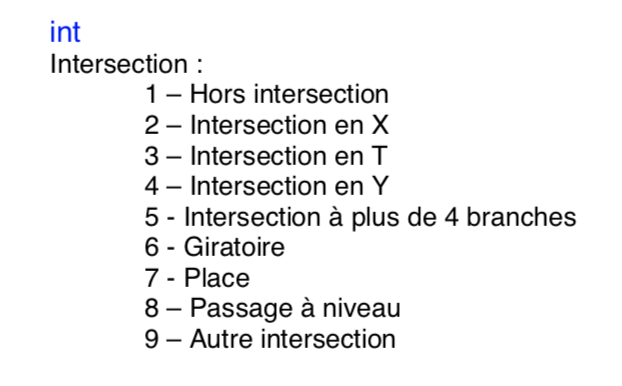

In [285]:
from IPython.display import Image
Image(filename=dossier+'extrait_documentation.png')

### 2.4.2. Remplaçons les valeurs par celles-ci  : {old_value : new_value}

In [297]:
unDicoDeRemplacement = {
        1: "Hors intersection",
        2: "Intersection en X",
        3: "Intersection en T",
        4: "Intersection en Y",
        5: "Intersection à plus de 4 branches ",
        6: "Giratoire",
        7: "Place",
        8: "Passage à niveau ",
        9: "Autre intersection"
}

**Avant :**

In [298]:
df.head()

,Num_Acc,annee,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,date
0,201600000001,16,2,1,1445,1,2,Hors intersection,8,3.0,5,"46, rue Sonneville",M,0.0,0.0,590,2016-02-01
1,201600000002,16,3,16,1800,1,2,Giratoire,1,6.0,5,1a rue du cimetière,M,0.0,0.0,590,2016-03-16
2,201600000003,16,7,13,1900,1,1,Hors intersection,1,6.0,11,NaN,M,0.0,0.0,590,2016-07-13
3,201600000004,16,8,15,1930,2,2,Hors intersection,7,3.0,477,52 rue victor hugo,M,0.0,0.0,590,2016-08-15
4,201600000005,16,12,23,1100,1,2,Intersection en T,1,3.0,11,rue Joliot curie,M,0.0,0.0,590,2016-12-23


**Après**

In [299]:
df.int.replace(unDicoDeRemplacement)[0:10]

0    Hors intersection
1            Giratoire
2    Hors intersection
3    Hors intersection
4    Intersection en T
5    Hors intersection
6    Hors intersection
7    Hors intersection
8    Hors intersection
9    Hors intersection
Name: int, dtype: object

#### parametre inplace=True pour effectuer la modif directement sur la df

In [300]:
df.int.replace(unDicoDeRemplacement, inplace=True)

In [301]:
df.head()

,Num_Acc,annee,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,date
0,201600000001,16,2,1,1445,1,2,Hors intersection,8,3.0,5,"46, rue Sonneville",M,0.0,0.0,590,2016-02-01
1,201600000002,16,3,16,1800,1,2,Giratoire,1,6.0,5,1a rue du cimetière,M,0.0,0.0,590,2016-03-16
2,201600000003,16,7,13,1900,1,1,Hors intersection,1,6.0,11,NaN,M,0.0,0.0,590,2016-07-13
3,201600000004,16,8,15,1930,2,2,Hors intersection,7,3.0,477,52 rue victor hugo,M,0.0,0.0,590,2016-08-15
4,201600000005,16,12,23,1100,1,2,Intersection en T,1,3.0,11,rue Joliot curie,M,0.0,0.0,590,2016-12-23


#### 2.4.3 Encore mieux: renommer plusieurs colonnes d'un coup !
<=> faire un dico de dicos donc ... 

In [303]:
remplacements_par_colonnes = {
    'colonne1': { 'ancienne_valeur1' : 'nouvelle_valeur1',
                  'ancienne_valeur2' : 'nouvelle_valeur2'},
    
    'agg':      { 1: 'Hors agglomeration',
                  2: 'En agglomeration' },
    
    'atm': {
                  1 : 'Normale',
                  2 : 'Pluie légère',
                  3 : 'Pluie forte',
                  4 : 'Neige - grêle',
                  5 : 'Brouillard - fumée ',
                  6 : 'Vent fort - tempête ',
                  7 : 'Temps éblouissant',
                  8 : 'Temps couvert',
                  9 : 'Autre'
            }
}

In [304]:
df.replace(remplacements_par_colonnes, inplace=True)

In [305]:
df.head()

,Num_Acc,annee,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,date
0,201600000001,16,2,1,1445,1,En agglomeration,Hors intersection,Temps couvert,3.0,5,"46, rue Sonneville",M,0.0,0.0,590,2016-02-01
1,201600000002,16,3,16,1800,1,En agglomeration,Giratoire,Normale,6.0,5,1a rue du cimetière,M,0.0,0.0,590,2016-03-16
2,201600000003,16,7,13,1900,1,Hors agglomeration,Hors intersection,Normale,6.0,11,NaN,M,0.0,0.0,590,2016-07-13
3,201600000004,16,8,15,1930,2,En agglomeration,Hors intersection,Temps éblouissant,3.0,477,52 rue victor hugo,M,0.0,0.0,590,2016-08-15
4,201600000005,16,12,23,1100,1,En agglomeration,Intersection en T,Normale,3.0,11,rue Joliot curie,M,0.0,0.0,590,2016-12-23


### 2.5. Les jointures

Amusons-nous un peu

In [20]:
df_vehicules2017 = pd.read_csv(dossier+"vehicules2017.csv")
df_usagers2017 = pd.read_csv(dossier+"usagers2017.csv")
df_caracteristiques2017 = pd.read_csv(dossier+"caracteristiques2017.csv", encoding='latin-1')
df_lieux2017 = pd.read_csv(dossier+"lieux2017.csv")

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
df_lieux_and_vehicules = df_vehicules2017.merge(df_lieux2017, on=["Num_Acc"], how='inner')

In [22]:
df_lieux_carac_vehicules = df_lieux_and_vehicules.merge(df_caracteristiques2017, on=["Num_Acc"], how='inner')

In [23]:
df_all = df_lieux_carac_vehicules.merge(df_usagers2017, on=['Num_Acc'], how='inner')

In [24]:
df_all.shape, df_lieux_carac_vehicules.shape, df_lieux_and_vehicules.shape, df_usagers2017.shape, df_vehicules2017.shape

((260392, 52), (103546, 41), (103546, 26), (136021, 12), (103546, 9))

#### pourquoi avons-nous plus de lignes?

### 2.6. Le GroupBy 

#### 2.6.1. juste pour regarder le nbr de valeurs types possibles par colonnes

In [503]:
df_all.nunique()

Num_Acc      60701
senc             3
catv            24
occutc          61
obs             17
obsm             7
choc            10
manv            25
num_veh_x       43
catr             7
voie          1526
v1               2
v2              45
circ             5
nbv             13
pr             444
pr1           1164
vosp             4
prof             5
plan             5
lartpc         231
larrout        356
surf            10
infra            8
situ             6
env1             3
place            9
catu             4
grav             4
sexe             2
trajet           7
secu            18
locp             9
actp             8
etatp            4
an_nais        103
num_veh_y       39
dtype: int64

In [496]:
df_all.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh_x,catr,...,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh_y
0,201700000001,0.0,7,0,0.0,2.0,3.0,9.0,B01,3,...,1,3,1,9.0,13.0,0.0,0.0,0.0,1968.0,B01
1,201700000001,0.0,7,0,0.0,2.0,3.0,9.0,B01,3,...,2,3,2,9.0,11.0,0.0,0.0,0.0,1973.0,B01
2,201700000001,0.0,7,0,0.0,2.0,3.0,9.0,B01,3,...,1,3,1,1.0,13.0,0.0,0.0,0.0,1967.0,A01
3,201700000001,0.0,10,0,0.0,2.0,3.0,13.0,A01,3,...,1,3,1,9.0,13.0,0.0,0.0,0.0,1968.0,B01
4,201700000001,0.0,10,0,0.0,2.0,3.0,13.0,A01,3,...,2,3,2,9.0,11.0,0.0,0.0,0.0,1973.0,B01


In [504]:
df_all[['sexe', 'catv','catu']].groupby('sexe')

In [505]:
for df_sub_name, df_subset in df_all[['sexe', 'catv','catu']].groupby('sexe'):
    print('\n nom du subset = ' + str(df_sub_name) + '\n')
    print(df_subset.head(10)) 


 nom du subset = 1

    sexe  catv  catu
0      1     7     1
2      1     7     1
3      1    10     1
5      1    10     1
6      1     7     1
7      1     7     1
8      1     1     1
9      1     1     1
10     1    10     1
11     1    10     1

 nom du subset = 2

    sexe  catv  catu
1      2     7     2
4      2    10     2
13     2    10     2
17     2     7     2
21     2     7     2
22     2     7     1
32     2     7     1
34     2    33     1
37     2     7     2
42     2    33     1


### 2.2. Faire des opérations avec groupby

Pas besoin de faire une boucle...

sum

In [516]:
df_all[['sexe','catu', 'etatp']].groupby(['catu', 'etatp']).mean()

sexe
catu etatp          
1    0.0    1.260947
2    0.0    1.536917
3    0.0    1.465160
     1.0    1.503612
     2.0    1.527878
     3.0    1.389671
4    0.0    1.166667
     1.0    1.288136
     2.0    1.230769
     3.0    1.333333

In [27]:
df_all.replace({'sexe' : { 1: 'Homme', 2: 'Femme'},
            'grav': {  1: 'Indemne',
                        2: 'Tué',
                        3: 'Blessé hospitalisé',
                        4: 'Blessé léger'},
            'catu': { 1: 'Conducteur',
                    2: 'Passager',
                    3: 'Piéton',
                    4: 'Piéton en roller ou en trottinette'}}, inplace=True)

grav
Blessé hospitalisé    AxesSubplot(0.125,0.125;0.775x0.755)
Blessé léger          AxesSubplot(0.125,0.125;0.775x0.755)
Indemne               AxesSubplot(0.125,0.125;0.775x0.755)
Tué                   AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

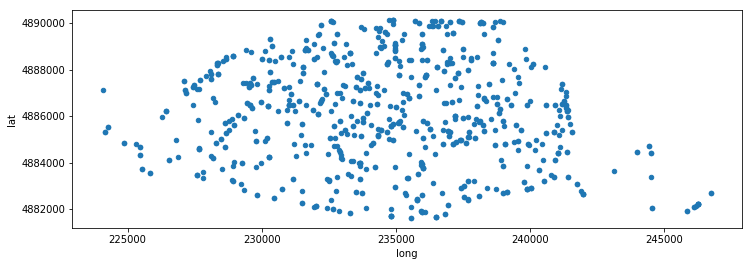

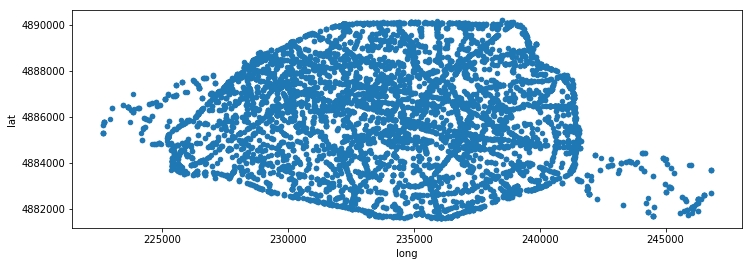

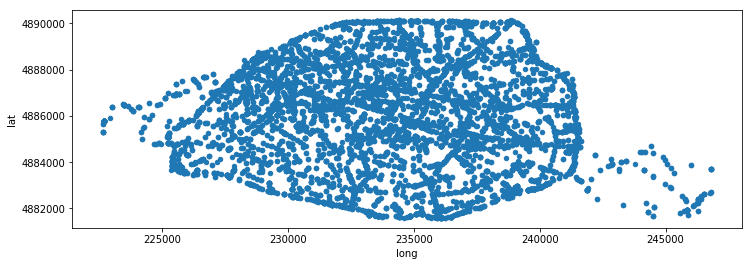

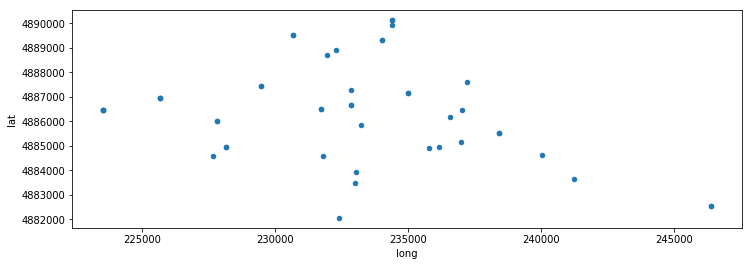

In [587]:
df_all[df_all['dep'] == 750].groupby(['grav']).plot(kind='scatter', x='long', y='lat') # oui c'est de l'art contemporain

#### sur même figure

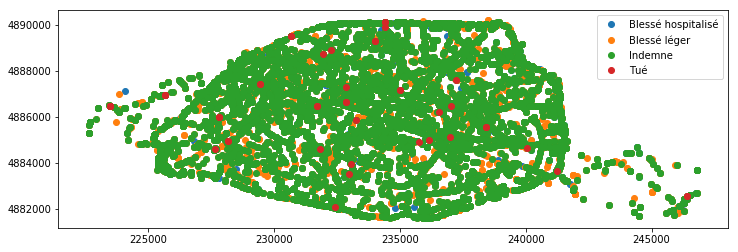

In [601]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for name, group in df_all[df_all['dep']==750].groupby(['grav']):
    ax.plot(group.long, group.lat, marker='o', linestyle='', ms=6, label=name)
ax.legend()

il y a autant de subsets que de valeurs différentes de org

On aurait pu utiliser seaborn biensûr sans faire de groupby mais les params {col='org', col_wrap=7} (si on voulait)

In [582]:
df_all[['sexe','catu', 'grav']].groupby(['sexe', 'catu', 'grav']).size()

sexe   catu                                grav              
Femme  Conducteur                          Blessé hospitalisé     7616
                                           Blessé léger          19539
                                           Indemne               24540
                                           Tué                     654
       Passager                            Blessé hospitalisé     5382
                                           Blessé léger          11731
                                           Indemne                7947
                                           Tué                     468
       Piéton                              Blessé hospitalisé     2286
                                           Blessé léger           3398
                                           Indemne                 104
                                           Tué                     192
       Piéton en roller ou en trottinette  Blessé hospitalisé       33
               

In [586]:
df_all[['sexe','catu', 'grav']].groupby(['sexe', 'catu', 'grav']).size().unstack()

grav                                      Blessé hospitalisé  Blessé léger  \
sexe  catu                                                                   
Femme Conducteur                                      7616.0       19539.0   
      Passager                                        5382.0       11731.0   
      Piéton                                          2286.0        3398.0   
      Piéton en roller ou en trottinette                33.0          50.0   
Homme Conducteur                                     26980.0       42746.0   
      Passager                                        4135.0        8290.0   
      Piéton                                          2351.0        3064.0   
      Piéton en roller ou en trottinette                69.0         143.0   

grav                                      Indemne     Tué  
sexe  catu                                                 
Femme Conducteur                          24540.0   654.0  
      Passager                             7947.0   468.0  
      Piéton                                104.0   192.0  
      Piéton en roller ou en trottinette      NaN     NaN  
Homme Conducteur                          74967.0  3589.0  
      Passager                             9169.0   430.0  
      Piéton                                143.0   366.0  
      Piéton en roller ou en trottinette      4.0     6.0

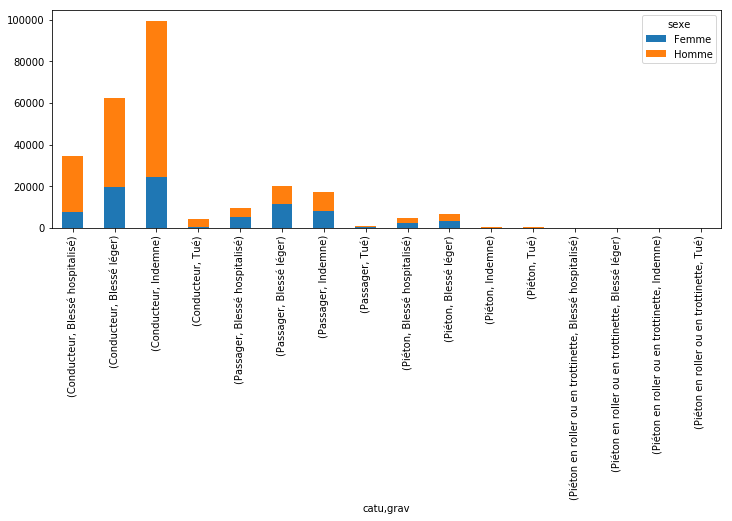

In [608]:
df_all[['sexe','catu', 'grav']].groupby(['catu', 'grav','sexe']).size().unstack().plot(kind='bar', stacked=True)

### [EDIT] Ajouts de TD3 pendant la séance en live

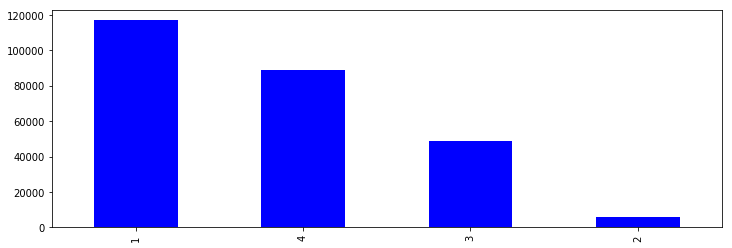

In [25]:
df_all.grav.value_counts(dropna=False).plot(kind='bar', color='blue')

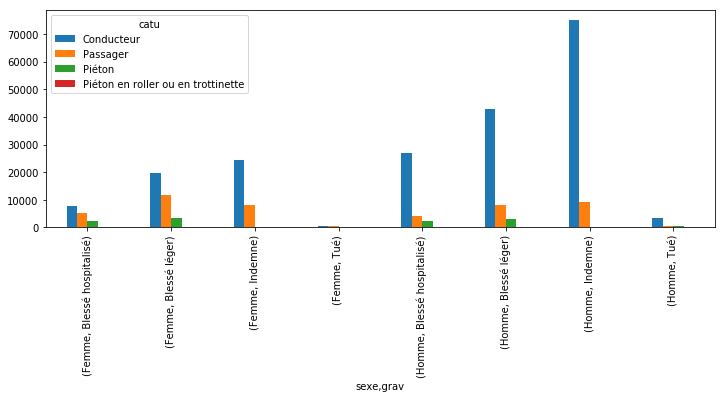

In [28]:
df_all.groupby(["sexe", "grav", "catu"]).size().unstack().plot(kind="bar")

### [EDIT] Ajouts de TD3 : création d'une petite fonction bien utile...

In [37]:
def affichage(df, departement=750, grouping_keys=['sexe', 'grav']):
    """
    Une petite définition de ce que fait la fonction (docstring) pour qui veut l'utiliser...
    Display a caracteristic geographically by keys for given department
        df : dataframe
        grouping_keys : a list of keys to groupby        
    """
    fig, ax = plt.subplots(figsize=(15,7), nrows=1, ncols=1)
    for dataset_name, dataset in df[df['dep']==departement].groupby(grouping_keys):
        ax.plot(dataset.long, dataset.lat, marker='o', linestyle='', ms=6, label=dataset_name)
    ax.legend()
    #return fig

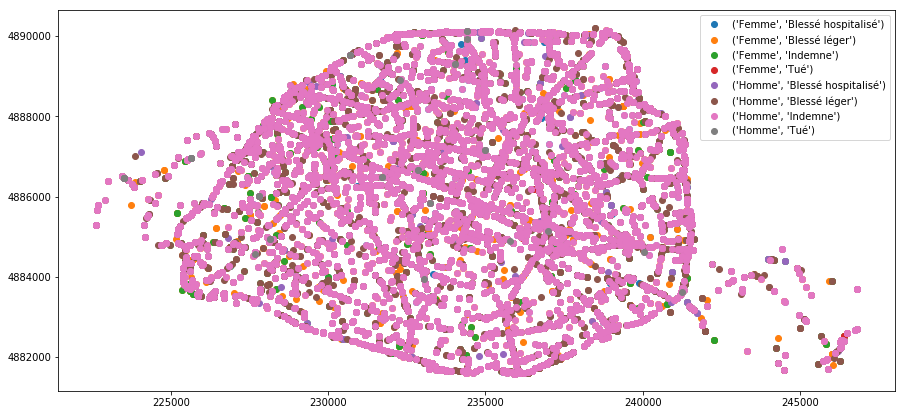

In [43]:
affichage(df_all)

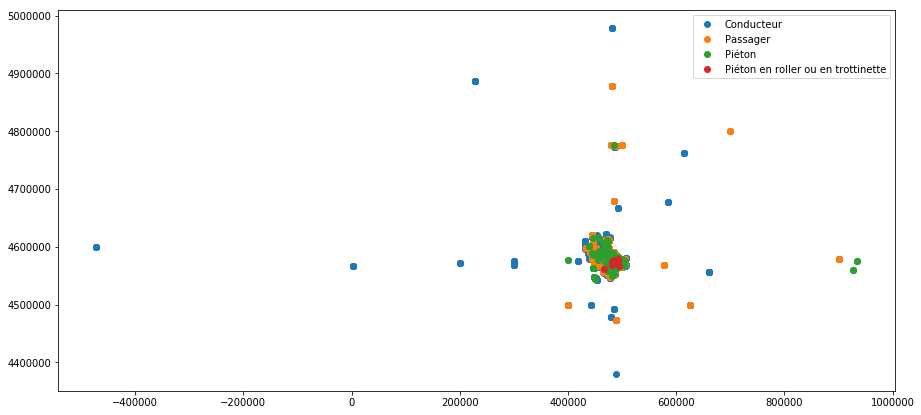

In [50]:
affichage(df_all, departement=690, grouping_keys=['catu']) # pour Lyon

### 2.3. Faire des aggrégations avec GroupBy

Plusieurs opés d'aggrégation peut être spécifiés avec le groupby (attention: a la fin il faut une ligne par clés du groupby)

(transfo en liste de valeurs par valeurs de org par exemple)

In [617]:
df_all[['sexe','grav', 'occutc']].groupby(['grav']).agg({'sexe':[list], 'occutc':['mean','sum', 'min']})

sexe  \
                                                                 list   
grav                                                                    
Blessé hospitalisé  [Homme, Femme, Homme, Homme, Femme, Homme, Hom...   
Blessé léger        [Homme, Homme, Homme, Homme, Homme, Femme, Fem...   
Indemne             [Homme, Homme, Homme, Homme, Femme, Homme, Hom...   
Tué                 [Homme, Homme, Homme, Homme, Homme, Homme, Fem...   

                      occutc             
                        mean    sum min  
grav                                     
Blessé hospitalisé  0.149042   7281   0  
Blessé léger        0.111959   9960   0  
Indemne             0.217174  25382   0  
Tué                 0.397897   2270   0

on peut même faire des fonctions customs! 

In [618]:
def f(all_values):
    # la fonction doit réduire comme dans un map / reduce n'est ce pas !
    import numpy as np
    return (np.std(all_values)/np.mean(all_values))

In [619]:
df_all[['sexe','grav', 'occutc']].groupby(['grav']).agg({'occutc':f})

,occutc
grav,
Blessé hospitalisé,17.988098
Blessé léger,20.768508
Indemne,16.189552
Tué,17.955592


### 3.3 Regardons un peu les N/As

In [622]:
df_all.isna().head(7)

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh_x,catr,...,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh_y,isHomme,isFemme
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [623]:
import seaborn as sns

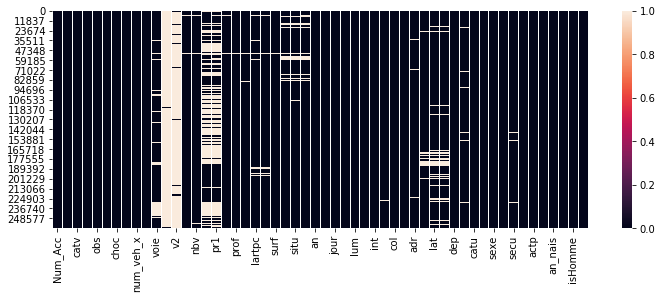

In [624]:
sns.heatmap(df_all.isna())

# Fin